In [1]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2,l1,l1_l2

In [2]:
#The dataset contains no header for columns, hence the header parameter
train=pd.read_csv('./mitbih_train.csv',header=None)
test=pd.read_csv('./mitbih_test.csv',header=None)

In [3]:
#Last column is the category column, a scaler value from 0 to 4
y_train2=train[train.columns[-1:]]
x_train2=train[train.columns[:-1]]
y_test2=test[test.columns[-1:]]
x_test2=test[test.columns[:-1]]


y_train2=y_train2.to_numpy()
x_train2=x_train2.to_numpy()
#Change the value to only use a subset of the dataset (like for quick tests...)
x_train2=x_train2[:362355][:][:]
y_train2=y_train2[:362355][:]
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_train2=x_train2.reshape([-1,187,1])


y_test2=y_test2.to_numpy()
x_test2=x_test2.to_numpy()
#Change the value to only use a subset of the dataset (like for quick tests...)
x_test2=x_test2[:362355][:][:]
y_test2=y_test2[:362355][:]
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_test2=x_test2.reshape([-1,187,1])

In [4]:
data = pd.concat([train, test]).sample(frac=1).reset_index(drop=True)
data.shape

(109446, 188)

In [5]:
random_seeed=42
cat=[0,0,0,0,0]

for i in range(5):
    cat[i]=data[data[187]==i]
    print(cat[i].shape)
    X=cat[i][cat[i].columns[:-1]]
    Y=cat[i][cat[i].columns[-1:]]
    x_train_t,x_test_t,y_train_t,y_test_t=train_test_split(X,Y,test_size=0.25,random_state=random_seeed)
    if(i>0):
        y_train=pd.concat([y_train, y_train_t]).sample(frac=1).reset_index(drop=True)
        x_train=pd.concat([x_train, x_train_t]).sample(frac=1).reset_index(drop=True)
        y_test=pd.concat([y_test, y_test_t]).sample(frac=1).reset_index(drop=True)
        x_test=pd.concat([x_test, x_test_t]).sample(frac=1).reset_index(drop=True)
    else:
        y_train=y_train_t
        x_train=x_train_t
        y_test=y_test_t
        x_test=x_test_t


(90589, 188)
(2779, 188)
(7236, 188)
(803, 188)
(8039, 188)


In [6]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(27363, 187)
(27363, 1)
(82083, 187)
(82083, 1)


In [7]:
def fun(state,data):
    sum = 0
    print(state)
    for i in range(5):
        lenn=len(data[data[187] == i ])
        print(lenn,end=" ")
        sum+=lenn
    print("Sum=",sum)
def fun2(state,rowdata,data):
    print(state," data:")
    fun("Befor",rowdata[rowdata.columns[-1:]])
    fun("After",data)

fun2("Test",test,y_test)
fun2("Train",train,y_train)

Test  data:
Befor
18118 556 1448 162 1608 Sum= 21892
After
22648 695 1809 201 2010 Sum= 27363
Train  data:
Befor
72471 2223 5788 641 6431 Sum= 87554
After
67941 2084 5427 602 6029 Sum= 82083


In [8]:
y_train=y_train.to_numpy()
x_train=x_train.to_numpy()
#Change the value to only use a subset of the dataset (like for quick tests...)
x_train=x_train[:362355][:][:]
y_train=y_train[:362355][:]
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_train=x_train.reshape([-1,187,1])

In [9]:
y_test=y_test.to_numpy()
x_test=x_test.to_numpy()
#Change the value to only use a subset of the dataset (like for quick tests...)
x_test=x_test[:362355][:][:]
y_test=y_test[:362355][:]
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_test=x_test.reshape([-1,187,1])

In [10]:
model=tf.keras.Sequential()
model.add(layers.Conv1D(64,7,activation='relu',input_shape=(187,1)))
model.add(layers.SpatialDropout1D(0.4))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(7))
model.add(layers.Conv1D(32,5,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(5))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(5,activation='softmax',kernel_regularizer=l1_l2(0.0001)))

In [11]:
model.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy']) #this was with validation
history=model.fit(x_train,y_train,batch_size=500,epochs=10,verbose=True,validation_split=0.2)

Epoch 1/10
132/132 [==============================] - 30s 218ms/step - loss: 1.0413 - accuracy: 0.7575 - val_loss: 1.1456 - val_accuracy: 0.8279
Epoch 2/10
132/132 [==============================] - 28s 211ms/step - loss: 0.7612 - accuracy: 0.8254 - val_loss: 0.8210 - val_accuracy: 0.8279
Epoch 3/10
132/132 [==============================] - 27s 208ms/step - loss: 0.7360 - accuracy: 0.8271 - val_loss: 0.7333 - val_accuracy: 0.8279
Epoch 4/10
132/132 [==============================] - 27s 207ms/step - loss: 0.7231 - accuracy: 0.8275 - val_loss: 0.7073 - val_accuracy: 0.8279
Epoch 5/10
132/132 [==============================] - 25s 191ms/step - loss: 0.7136 - accuracy: 0.8276 - val_loss: 0.7008 - val_accuracy: 0.8279
Epoch 6/10
132/132 [==============================] - 23s 174ms/step - loss: 0.7075 - accuracy: 0.8277 - val_loss: 0.6996 - val_accuracy: 0.8279
Epoch 7/10
132/132 [==============================] - 23s 173ms/step - loss: 0.7026 - accuracy: 0.8277 - val_loss: 0.6931 - val_ac

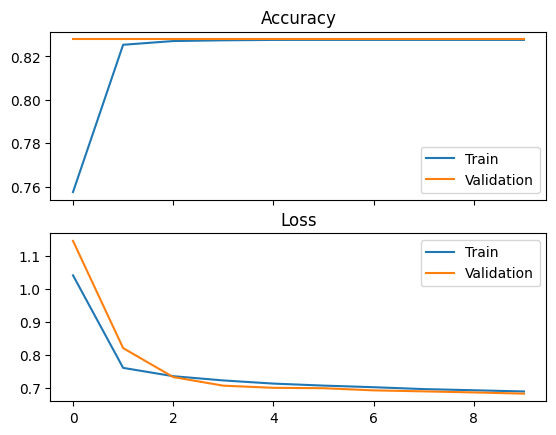

In [12]:
fig, ax = plt.subplots(2,sharex=True)
ax[0].set_title("Accuracy")
ax[0].plot(history.epoch, history.history['accuracy'],label='Train');
ax[0].plot(history.epoch, history.history['val_accuracy'],label='Validation');
ax[0].legend()
ax[1].set_title("Loss")
ax[1].plot(history.epoch, history.history['loss'],label='Train');
ax[1].plot(history.epoch, history.history['val_loss'],label='Validation');
ax[1].legend()

In [13]:
model.evaluate(x_test, y_test, verbose=True)

856/856 [==============================] - 3s 3ms/step - loss: 0.6858 - accuracy: 0.8277


[0.6858121156692505, 0.8276870250701904]

In [14]:
model2=tf.keras.Sequential()
model2.add(layers.Conv1D(64,7,activation='relu',input_shape=(187,1)))
model2.add(layers.SpatialDropout1D(0.4))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPool1D(7))
model2.add(layers.Conv1D(32,5,activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPool1D(5))
model2.add(layers.GlobalMaxPool1D())
model2.add(layers.Dense(5,activation='softmax',kernel_regularizer=l1_l2(0.0001)))

In [15]:
model2.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy']) #this was with validation
history2=model2.fit(x_train2,y_train2,batch_size=500,epochs=10,verbose=True,validation_split=0.2)

Epoch 1/10
141/141 [==============================] - 25s 175ms/step - loss: 0.4676 - accuracy: 0.9121 - val_loss: 1.7491 - val_accuracy: 0.1394
Epoch 2/10
141/141 [==============================] - 23s 163ms/step - loss: 0.0818 - accuracy: 0.9987 - val_loss: 2.1079 - val_accuracy: 0.1386
Epoch 3/10
141/141 [==============================] - 22s 156ms/step - loss: 0.0624 - accuracy: 0.9998 - val_loss: 3.0011 - val_accuracy: 0.1387
Epoch 4/10
141/141 [==============================] - 22s 157ms/step - loss: 0.0527 - accuracy: 0.9999 - val_loss: 4.5379 - val_accuracy: 0.1387
Epoch 5/10
141/141 [==============================] - 22s 159ms/step - loss: 0.0469 - accuracy: 0.9999 - val_loss: 6.1643 - val_accuracy: 0.1387
Epoch 6/10
141/141 [==============================] - 22s 158ms/step - loss: 0.0430 - accuracy: 0.9999 - val_loss: 7.1050 - val_accuracy: 0.1387
Epoch 7/10
141/141 [==============================] - 22s 157ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 7.4048 - val_ac

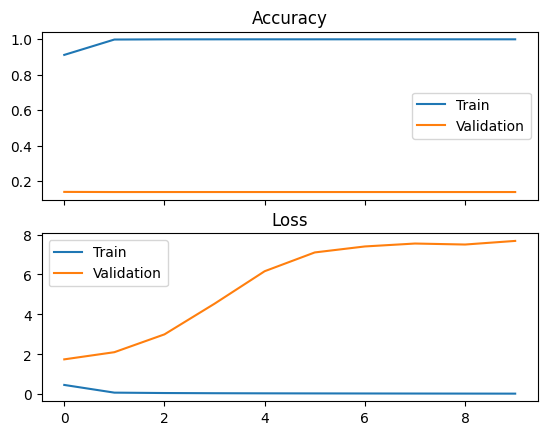

In [16]:
fig, ax = plt.subplots(2,sharex=True)
ax[0].set_title("Accuracy")
ax[0].plot(history2.epoch, history2.history['accuracy'],label='Train');
ax[0].plot(history2.epoch, history2.history['val_accuracy'],label='Validation');
ax[0].legend()
ax[1].set_title("Loss")
ax[1].plot(history2.epoch, history2.history['loss'],label='Train');
ax[1].plot(history2.epoch, history2.history['val_loss'],label='Validation');
ax[1].legend()

In [17]:
model2.evaluate(x_test2, y_test2, verbose=True)

685/685 [==============================] - 3s 4ms/step - loss: 1.5633 - accuracy: 0.8276


[1.5633113384246826, 0.8276082873344421]